# Quadratic Discriminant Analysis

## Importing Libraries

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Training and Test Data

In [4]:
# Load the saved datasets from the CSV files
X_train = pd.read_csv("../data/X_train.csv", index_col=0)  # Use the first column as index
y_train = pd.read_csv("../data/y_train.csv", index_col=0)  # Use the first column as index
X_test = pd.read_csv("../data/X_test.csv", index_col=0)    # Use the first column as index
y_test = pd.read_csv("../data/y_test.csv", index_col=0)    # Use the first column as index

# Display the first few rows of the loaded datasets
(X_train.head(), y_train.head(), X_test.head(), y_test.head())

(   age         workclass  fnlwgt  education  education-num  \
 0   39         State-gov   77516  Bachelors             13   
 1   50  Self-emp-not-inc   83311  Bachelors             13   
 2   38           Private  215646    HS-grad              9   
 3   53           Private  234721       11th              7   
 4   28           Private  338409  Bachelors             13   
 
        marital-status         occupation   relationship   race     sex  \
 0       Never-married       Adm-clerical  Not-in-family  White    Male   
 1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
 2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
 3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
 4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
 
    capital-gain  capital-loss  hours-per-week native-country  
 0          2174             0              40  United-States  
 1             0             0          

## Quadratic Discriminant Analysis

In [5]:
# Step 1: One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Step 2: Align the test set with the training set to handle missing categories
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)

# Step 3: Fill missing values in the test set with 0
X_test_encoded.fillna(0, inplace=True)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 5: Ensure target arrays are flattened
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

# Step 6: Fit the LDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train_array)

# Step 7: Predict on the test set
y_pred = qda.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test_array, y_pred)
conf_matrix = confusion_matrix(y_test_array, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate precision, recall, and F1-score (without changing pos_label)
precision = precision_score(y_test_array, y_pred, pos_label='>50K')
recall = recall_score(y_test_array, y_pred, pos_label='>50K')
f1 = f1_score(y_test_array, y_pred, pos_label='>50K')

# Print results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.562637847375386
Confusion Matrix:
[[3305 3557]
 [ 409 1797]]
Precision: 0.33563690698543147
Recall: 0.8145965548504079
F1-Score: 0.4753968253968254


C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Visualisations

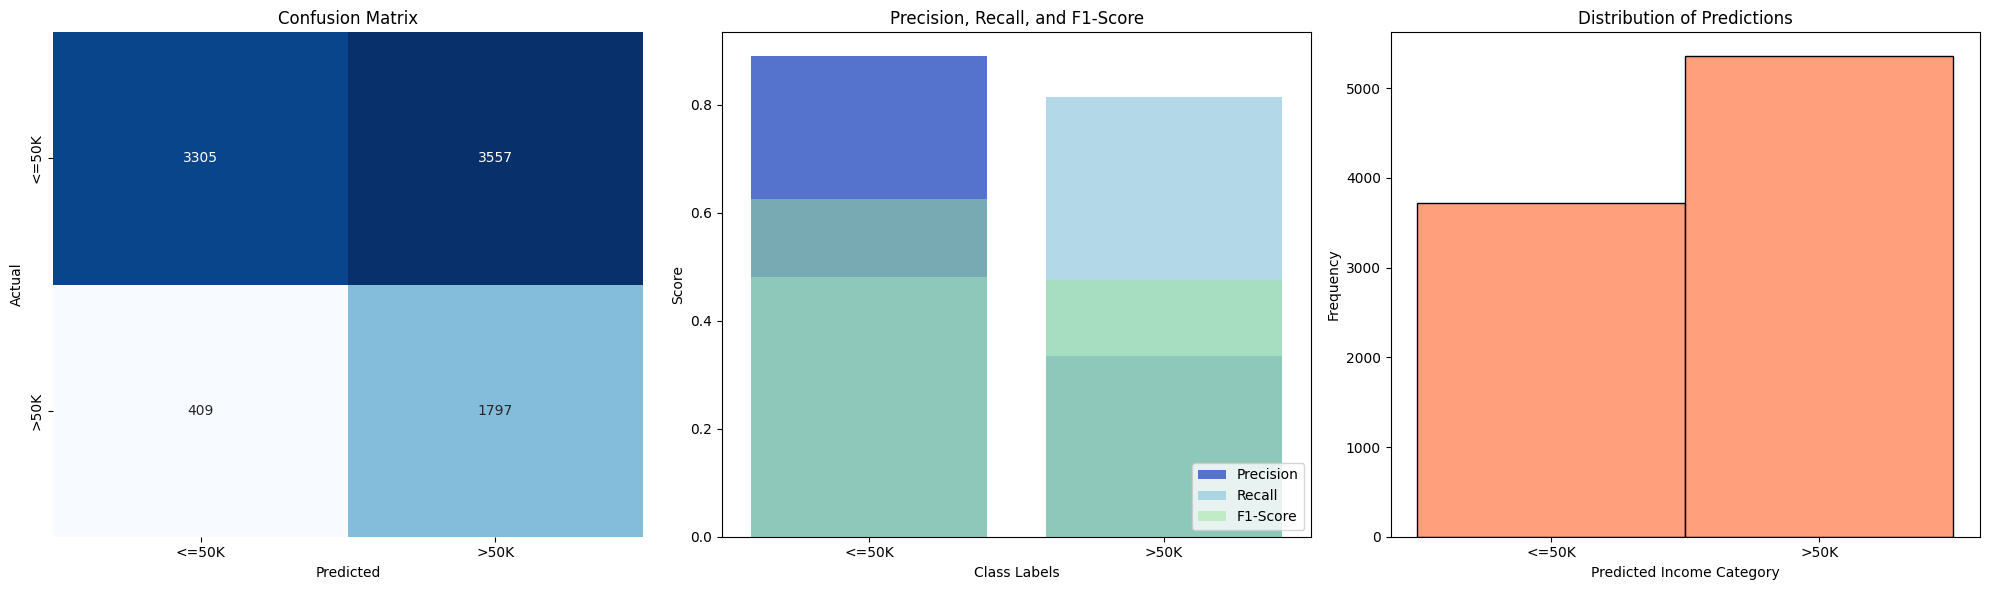

In [6]:
# Step 1: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20, 6))  # Adjusting the figure size for horizontal alignment

# Confusion Matrix
plt.subplot(1, 3, 1)  # First plot in a row of 3
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Step 2: Precision, Recall, F1-Score Barplot
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

plt.subplot(1, 3, 2)  # Second plot in a row of 3
sns.barplot(x=class_report_df.index[:-3], y=class_report_df['precision'][:-3], color='royalblue', label='Precision')
sns.barplot(x=class_report_df.index[:-3], y=class_report_df['recall'][:-3], color='skyblue', label='Recall', alpha=0.7)
sns.barplot(x=class_report_df.index[:-3], y=class_report_df['f1-score'][:-3], color='lightgreen', label='F1-Score', alpha=0.5)
plt.title("Precision, Recall, and F1-Score")
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.legend(loc="lower right")

# Step 3: Distribution of Predictions
plt.subplot(1, 3, 3)  # Third plot in a row of 3
sns.histplot(y_pred, kde=False, color='coral')
plt.title("Distribution of Predictions")
plt.xlabel("Predicted Income Category")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

## QDA with k-fold Cross-validation

C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Cross-Validation Accuracy: 0.5581284256046664


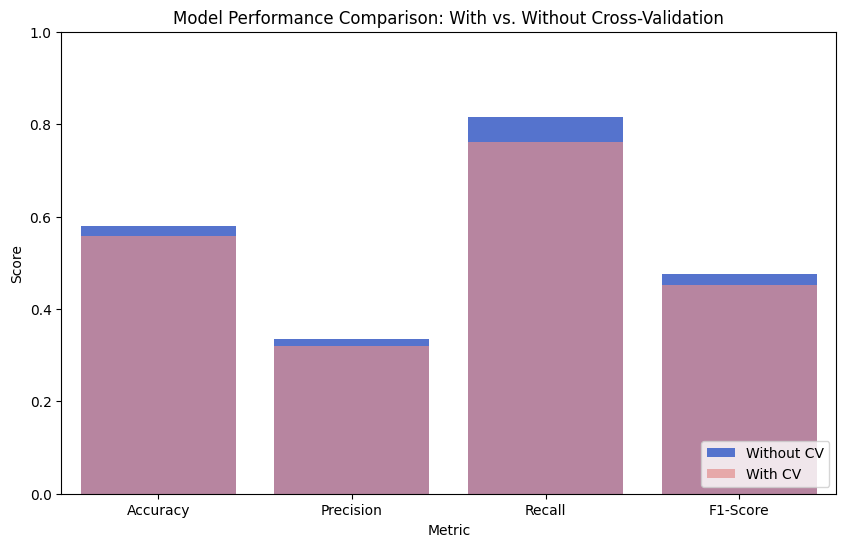

Classification Report with Cross-Validation:
              precision    recall  f1-score   support

       <=50K       0.87      0.49      0.63     30293
        >50K       0.32      0.76      0.45      9481

    accuracy                           0.56     39774
   macro avg       0.59      0.63      0.54     39774
weighted avg       0.74      0.56      0.59     39774



In [15]:
# Initialize the LDA model
qda = QuadraticDiscriminantAnalysis()

# Step 1: Perform cross-validation and obtain predictions for each fold
y_pred_cv = cross_val_predict(qda, X_train_scaled, y_train.values.ravel(), cv=5)

# Step 2: Calculate accuracy scores
cv_accuracy = np.mean(y_pred_cv == y_train.values.ravel())
print(f"Cross-Validation Accuracy: {cv_accuracy}")

# Step 3: Generate classification report
cv_class_report = classification_report(y_train, y_pred_cv, output_dict=True)
cv_class_report_df = pd.DataFrame(cv_class_report).transpose()

# Step 4: Prepare for visualization
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Without CV': [
        accuracy,
        class_report_df.loc['>50K', 'precision'],
        class_report_df.loc['>50K', 'recall'],
        class_report_df.loc['>50K', 'f1-score']
    ],
    'With CV': [
        cv_accuracy,
        cv_class_report_df.loc['>50K', 'precision'],
        cv_class_report_df.loc['>50K', 'recall'],
        cv_class_report_df.loc['>50K', 'f1-score']
    ]
})

# Step 5: Plotting Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Without CV', data=metrics_df, color='royalblue', label='Without CV')
sns.barplot(x='Metric', y='With CV', data=metrics_df, color='lightcoral', label='With CV', alpha=0.7)

plt.title("Model Performance Comparison: With vs. Without Cross-Validation")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()

# Step 6: Display classification reports for reference
# Ensure to use y_pred_cv (from cross-validation) instead of y_pred
print("Classification Report with Cross-Validation:")
print(classification_report(y_train.values.ravel(), y_pred_cv))

## ROC Curve

C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


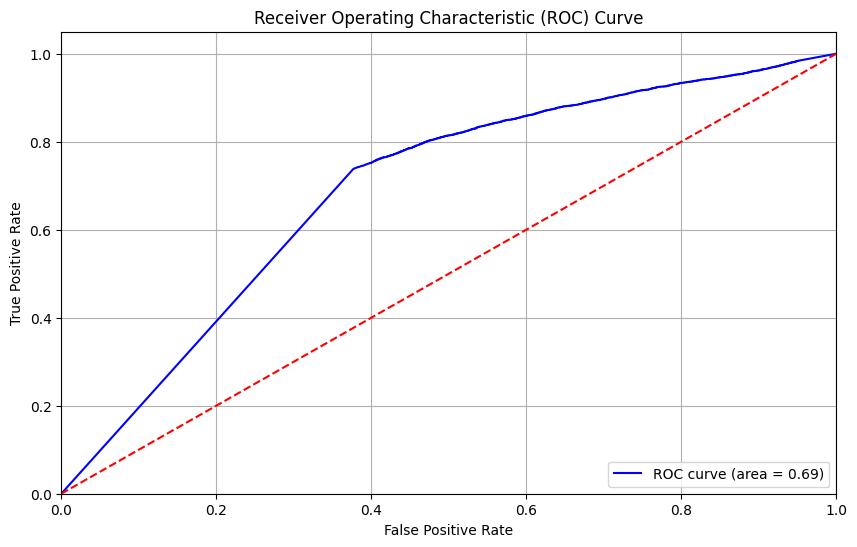

In [8]:
# Ensure y_train is a 1D array by converting it to a NumPy array
y_train_array = y_train.values.ravel()

# Step 1: Fit the LDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train_array)

# Step 2: Get predicted probabilities for the positive class (>50K)
y_pred_prob = qda.predict_proba(X_train_scaled)[:, 1]  # Get probabilities for the >50K class

# Step 3: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train_array, y_pred_prob, pos_label='>50K')
roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve

# Step 4: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## PCA to Improve QDA

In [9]:
from sklearn.decomposition import PCA

# Apply PCA after scaling the data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit QDA using PCA-transformed data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_pca, y_train_array)

# Predict and evaluate
y_pred = qda.predict(X_test_pca)

accuracy = accuracy_score(y_test_array, y_pred)
print(f'Accuracy with PCA: {accuracy}')


Accuracy with PCA: 0.5798411998235553


## Removing Highly Correlated Features to Improve QDA

In [10]:
# Calculate correlation matrix
corr_matrix = X_train_encoded.corr()

# Identify columns with high correlation (> 0.9)
high_corr = corr_matrix.abs().stack().reset_index().query('level_0 != level_1 and 0 > 0.9')
high_corr_pairs = high_corr[['level_0', 'level_1']].values

print(f"Highly correlated pairs: {high_corr_pairs}")


Highly correlated pairs: []


## Implementing Regularised Discriminant Analysis

In [14]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

class RegularizedDiscriminantAnalysis:
    def __init__(self, alpha=0.5):
        self.alpha = alpha
        self.lda = LinearDiscriminantAnalysis(store_covariance=True)
        self.qda = QuadraticDiscriminantAnalysis(store_covariance=True)

    def fit(self, X, y):
        self.lda.fit(X, y)
        self.qda.fit(X, y)
        return self

    def predict(self, X):
        lda_means = self.lda.means_
        lda_cov = self.lda.covariance_
        qda_cov = self.qda.covariance_
        
        rda_cov = (1 - self.alpha) * lda_cov + self.alpha * np.mean(qda_cov, axis=0)
        inv_rda_cov = np.linalg.inv(rda_cov)

        # Calculate decision function
        decision = np.array([X @ inv_rda_cov @ mean for mean in lda_means]).T
        return self.lda.classes_[np.argmax(decision, axis=1)]

# Example usage
rda_model = RegularizedDiscriminantAnalysis(alpha=0.5)
rda_model.fit(X_train_scaled, y_train_array)
y_pred_rda = rda_model.predict(X_test_scaled)

# Evaluate
accuracy_rda = accuracy_score(y_test_array, y_pred_rda)
conf_matrix_rda = confusion_matrix(y_test_array, y_pred_rda)

print(f'RDA Accuracy: {accuracy_rda}')
print('Confusion Matrix:')
print(conf_matrix_rda)


RDA Accuracy: 0.46195412439347155
Confusion Matrix:
[[2166 4696]
 [ 183 2023]]


C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
